In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import coo_matrix
from sklearn.metrics.pairwise import cosine_similarity

import networkx as nx

path = r'C:\Users\user\Desktop\수업\석사 3차\1. 소셜네트워크분석\3. 과제\Yelp-JSON\Yelp JSON\yelp_dataset'

In [2]:
# Review
# data load
file_name = r'\yelp_academic_dataset_review.json'

data_file = open(path + file_name)

data = []
for line in data_file:
    data.append(json.loads(line))

data_file.close()
df_review = pd.DataFrame(data)

print(df_review.shape)
print(df_review.columns)
df_review.head()

(6990280, 9)
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
# Social Network
# data load
file_name = r'\yelp_academic_dataset_user.json'

data_file = open(path + file_name)

data = []
for line in data_file:
    data.append(json.loads(line))

data_file.close()
df_friend = pd.DataFrame(data)

print(df_friend.shape)
df_friend.head()

(1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [4]:
# 리뷰를 n개 이상 남긴 유저만 고려
n = 20

review_cnt = df_review['user_id'].value_counts(ascending = False)
valid_user = review_cnt.loc[review_cnt >= n].index

In [5]:
df_review_filtered = df_review.loc[df_review['user_id'].isin(valid_user)].reset_index(drop = True)
print('리뷰 n개 이상 남긴 df:', df_review_filtered.shape)

df_friend_filtered = df_friend.loc[df_friend['user_id'].isin(valid_user)].reset_index(drop = True)
print('소셜네트워크에서 리뷰 n개 이상 남긴 df:', df_friend_filtered.shape)

리뷰 n개 이상 남긴 df: (2346625, 9)
소셜네트워크에서 리뷰 n개 이상 남긴 df: (44911, 22)


Text(0, 0.5, 'Frequency')

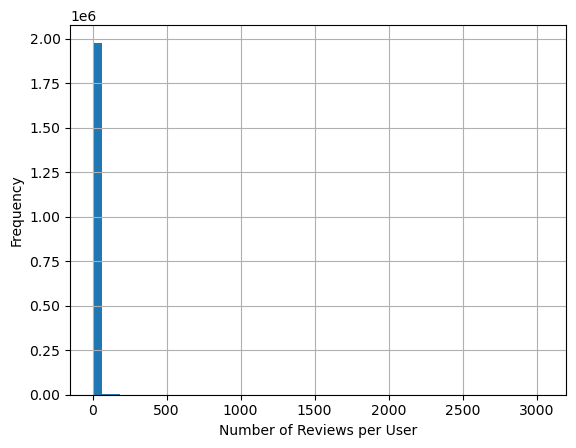

In [ ]:
# review_cnt.hist(bins=50)
# plt.xlabel("Number of Reviews per User")
# plt.ylabel("Frequency")

In [ ]:
# def coverage(n):
#     return (review_cnt >= n).mean()

# for n in [1, 5, 10, 20, 30, 50, 100]:
#     print(n, coverage(n))


1 1.0
5 0.1444297054874696
10 0.05904134403190456
20 0.02259185312956348
30 0.01284754133573181
50 0.006353345617474266
100 0.0021957524639964507


In [6]:
# rating matrix 생성
temp = df_review_filtered[['user_id', 'business_id', 'stars']]
temp = temp.copy()

temp['user_cat'] = temp['user_id'].astype('category')
temp['user_idx'] = temp['user_cat'].cat.codes

temp['business_cat'] = temp['business_id'].astype('category')
temp['business_idx'] = temp['business_cat'].cat.codes

rating_mat = coo_matrix((temp['stars'], (temp['user_idx'], temp['business_idx'])))
rating_mat = rating_mat.tocsr()
rating_mat

<44911x137666 sparse matrix of type '<class 'numpy.float64'>'
	with 2204306 stored elements in Compressed Sparse Row format>

In [29]:
# 코사인 유사도 top_k명
num_users = rating_mat.shape[0]
top_k = 20

rows = []

for i in range(100):
    target_user = rating_mat[i]

    sim = cosine_similarity(target_user, rating_mat).flatten()
    sim[i] = -1 # 자기 자신 제거

    top_idx = np.argsort(sim)[-top_k:][::-1]

    for neigh in top_idx:
        rows.append([i, neigh, sim[neigh]])

df_sim = pd.DataFrame(rows, columns = ['user_idx', 'neighbor_idx', 'similarity'])
df_sim.head()

,user_idx,neighbor_idx,similarity
0,0,24529,0.215365
1,0,32977,0.214250
2,0,5361,0.185695
3,0,23972,0.178402
4,0,8766,0.164421


In [31]:
df_sim.loc[df_sim['similarity']>0]

,user_idx,neighbor_idx,similarity
0,0,24529,0.215365
1,0,32977,0.214250
2,0,5361,0.185695
3,0,23972,0.178402
4,0,8766,0.164421
...,...,...,...
1995,99,1681,0.146425
1996,99,5921,0.144078
1997,99,22347,0.142673
1998,99,19176,0.142364


In [8]:
# 테스트
df_friend_filtered_temp = df_friend_filtered[:10]
df_friend_filtered_temp

G = nx.Graph()

# 유저 ID 리스트
for idx, row in df_friend_filtered_temp.iterrows():
    user = row['user_id']

    # 친구 목록 (쉼표로 split)
    if pd.notna(row['friends']):
        friends = [f.strip() for f in row['friends'].split(',')]
    else:
        friends = []

    # 그래프에 간선 추가
    for friend in friends:
        G.add_edge(user, friend)

In [10]:
import itertools

users = df_friend_filtered_temp['user_id'].tolist()
users

rows = []

for u1, u2 in itertools.combinations(users, 2):
    if u1 in G and u2 in G:
        try:
            dist = nx.shortest_path_length(G, u1, u2)
        except nx.NetworkXNoPath:
            dist = None
    else:
        None
    
    rows.append([u1, u2, dist])

df_dist = pd.DataFrame(rows, columns = ['user1', 'user2', 'shortest_path'])
df_dist


,user1,user2,shortest_path
0,j14WgRoU_-2ZE1aw1dXrJg,SZDeASXq7o05mMNLshsdIA,3
1,j14WgRoU_-2ZE1aw1dXrJg,1L3O2CUTk27SnmqyPBWQdQ,2
2,j14WgRoU_-2ZE1aw1dXrJg,MGPQVLsODMm9ZtYQW-g_OA,2
3,j14WgRoU_-2ZE1aw1dXrJg,4ZaqBJqt7laPPs8xfWvr6A,2
4,j14WgRoU_-2ZE1aw1dXrJg,NIhcRW6DWvk1JQhDhXwgOQ,2
5,j14WgRoU_-2ZE1aw1dXrJg,rppTTi-kfF8-qyiArNemag,2
6,j14WgRoU_-2ZE1aw1dXrJg,QJI9OSEn6ujRCtrX06vs1w,1
7,j14WgRoU_-2ZE1aw1dXrJg,AkBtT43dYcttxQ3qOzPBAg,2
8,j14WgRoU_-2ZE1aw1dXrJg,rCedFOnskGvHQTprtA4-5g,2
9,SZDeASXq7o05mMNLshsdIA,1L3O2CUTk27SnmqyPBWQdQ,4


In [13]:
import pandas as pd
import networkx as nx

# ============================================================
# 1. 데이터 준비
# ============================================================

# 100명만 샘플링한다고 가정
df_friend_filtered_temp = df_friend_filtered[:100].copy()

# 유저 ID 리스트
users = df_friend_filtered_temp['user_id'].tolist()


# ============================================================
# 2. 그래프 생성하기
# ============================================================

G = nx.Graph()

for idx, row in df_friend_filtered_temp.iterrows():
    user = row['user_id']

    # 친구목록 split
    if pd.notna(row["friends"]):
        friends = [f.strip() for f in row["friends"].split(",") if f.strip() != ""]
    else:
        friends = []

    # edge 추가
    for friend in friends:
        G.add_edge(user, friend)

print("그래프 노드 수:", G.number_of_nodes())
print("그래프 엣지 수:", G.number_of_edges())


# ============================================================
# 3. 최적화된 방식: 각 유저당 single-source shortest path
# ============================================================

rows = []

for u1 in users:
    # u1에서 시작하는 모든 shortest path (BFS 1번)
    lengths = nx.single_source_shortest_path_length(G, u1)

    for u2 in users:
        if u1 == u2: continue

        # u1→u2 거리. 경로 없으면 None
        dist = lengths.get(u2, None)
        rows.append([u1, u2, dist])


# ============================================================
# 4. DataFrame으로 변환
# ============================================================

df_dist = pd.DataFrame(rows, columns=["user1", "user2", "shortest_path"])
print(df_dist.head())

df_dist


그래프 노드 수: 66615
그래프 엣지 수: 91843
                    user1                   user2  shortest_path
0  j14WgRoU_-2ZE1aw1dXrJg  SZDeASXq7o05mMNLshsdIA            3.0
1  j14WgRoU_-2ZE1aw1dXrJg  1L3O2CUTk27SnmqyPBWQdQ            2.0
2  j14WgRoU_-2ZE1aw1dXrJg  MGPQVLsODMm9ZtYQW-g_OA            2.0
3  j14WgRoU_-2ZE1aw1dXrJg  4ZaqBJqt7laPPs8xfWvr6A            2.0
4  j14WgRoU_-2ZE1aw1dXrJg  NIhcRW6DWvk1JQhDhXwgOQ            2.0


,user1,user2,shortest_path
0,j14WgRoU_-2ZE1aw1dXrJg,SZDeASXq7o05mMNLshsdIA,3.0
1,j14WgRoU_-2ZE1aw1dXrJg,1L3O2CUTk27SnmqyPBWQdQ,2.0
2,j14WgRoU_-2ZE1aw1dXrJg,MGPQVLsODMm9ZtYQW-g_OA,2.0
3,j14WgRoU_-2ZE1aw1dXrJg,4ZaqBJqt7laPPs8xfWvr6A,2.0
4,j14WgRoU_-2ZE1aw1dXrJg,NIhcRW6DWvk1JQhDhXwgOQ,2.0
...,...,...,...
9895,v9VCObZVWhOPdm1rKt8Dvg,UJEjJgi1xpmLR4b3J8fn2Q,2.0
9896,v9VCObZVWhOPdm1rKt8Dvg,MUzkXfPS9JaMgJ907orz0g,2.0
9897,v9VCObZVWhOPdm1rKt8Dvg,LyoBey7pYHult00lhiS02g,1.0
9898,v9VCObZVWhOPdm1rKt8Dvg,GcWXTgLffuZ5BsuZGcl02Q,2.0


In [19]:
df_dist.groupby('user1')

In [23]:
df_dist['shortest_path_norm'] = np.nan

for u1, group in df_dist.groupby('user1'):
    dists = group['shortest_path'].dropna()

    if len(dists) == 0:
        continue

    d_min = dists.min()
    d_max = dists.max()

    if d_max == d_min:
        df_dist.loc[group.index, 'shortest_path_norm'] = 1.0
    else:
        norm = (group['shortest_path'] - d_min) / (d_max - d_min)
        df_dist.loc[group.index, 'shortest_path_norm'] = norm

In [24]:
df_dist

,user1,user2,shortest_path,shortest_path_norm
0,j14WgRoU_-2ZE1aw1dXrJg,SZDeASXq7o05mMNLshsdIA,3.0,0.666667
1,j14WgRoU_-2ZE1aw1dXrJg,1L3O2CUTk27SnmqyPBWQdQ,2.0,0.333333
2,j14WgRoU_-2ZE1aw1dXrJg,MGPQVLsODMm9ZtYQW-g_OA,2.0,0.333333
3,j14WgRoU_-2ZE1aw1dXrJg,4ZaqBJqt7laPPs8xfWvr6A,2.0,0.333333
4,j14WgRoU_-2ZE1aw1dXrJg,NIhcRW6DWvk1JQhDhXwgOQ,2.0,0.333333
...,...,...,...,...
9895,v9VCObZVWhOPdm1rKt8Dvg,UJEjJgi1xpmLR4b3J8fn2Q,2.0,0.500000
9896,v9VCObZVWhOPdm1rKt8Dvg,MUzkXfPS9JaMgJ907orz0g,2.0,0.500000
9897,v9VCObZVWhOPdm1rKt8Dvg,LyoBey7pYHult00lhiS02g,1.0,0.000000
9898,v9VCObZVWhOPdm1rKt8Dvg,GcWXTgLffuZ5BsuZGcl02Q,2.0,0.500000


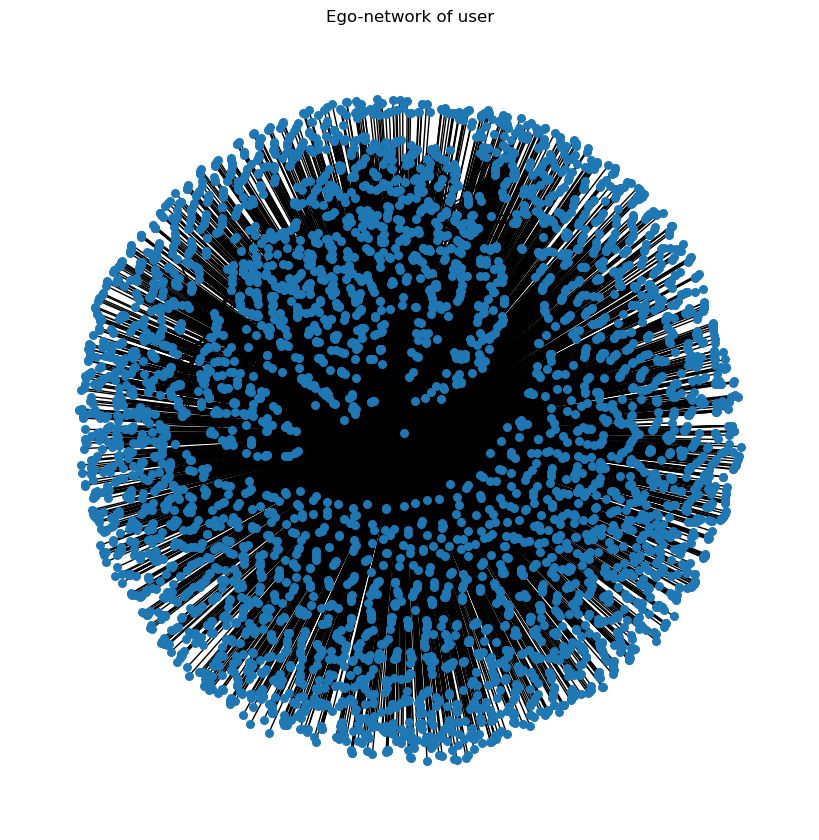

In [14]:
# 시각화
user = "j14WgRoU_-2ZE1aw1dXrJg"

# Ego graph
ego = nx.ego_graph(G, user, radius=1)

plt.figure(figsize=(8, 8))
nx.draw(ego, with_labels=False, node_size=30)
plt.title("Ego-network of user")
plt.show()
